In [34]:
# Import Packages
from ml import *

In [35]:
# Load data
data = pd.read_csv('/datc/parcel/notebooks/data/postnl/20200904_sample.csv', index_col=0, parse_dates=[1])

In [36]:
data

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag
0,2015-01-02,klant_1,8421,0
1,2015-01-02,klant_2,4547,0
2,2015-01-02,klant_3,13,0
3,2015-01-02,klant_4,0,0
4,2015-01-02,klant_5,0,0
...,...,...,...,...
9835,2019-06-29,klant_2,0,24917
9836,2019-06-29,klant_3,0,20
9837,2019-06-29,klant_4,0,1
9838,2019-06-29,klant_5,0,116


In [37]:
cust_filter = data['cust_id'] == 'klant_2'
date_filter = data['procesdag'].dt.dayofweek <= 4
data = data.where(date_filter & cust_filter).dropna()

In [38]:
data.procesdag = pd.to_datetime(data.procesdag)

In [39]:
sec = ((data.procesdag).astype(int) / 1e9).astype(int)

In [40]:
min((sec - sec.shift(1)).dropna())
max((sec - sec.shift(1)).dropna())

259200.0

In [41]:
y = data.aantal_pakketten_volgende_dag
X = data[['procesdag', 'aantal_pakketten']]

In [42]:
train_X = X[:7000]
valid_X = X[7000:]
train_y = y[:7000]
valid_y = y[7000:]

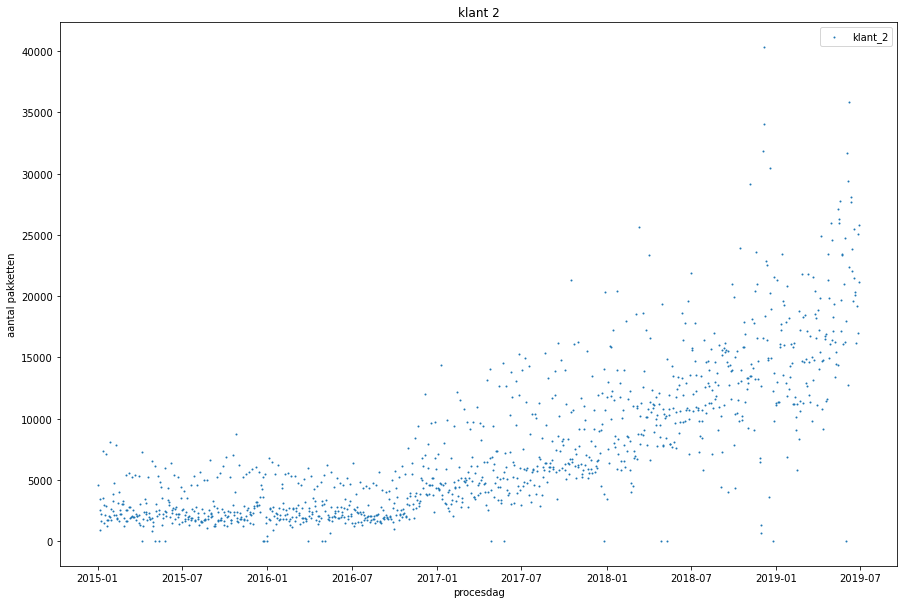

In [43]:
train_X1 = train_X.where(data['cust_id'] == 'klant_2').dropna()
fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(train_X1['procesdag'], train_X1.aantal_pakketten, label='klant_2', s=1)

plt.ylabel('aantal pakketten')
plt.xlabel('procesdag')
plt.title('klant 2')
plt.legend();

In [44]:
train_X1

,procesdag,aantal_pakketten
1,2015-01-02,4547.0
19,2015-01-05,3404.0
25,2015-01-06,2526.0
31,2015-01-07,891.0
37,2015-01-08,1624.0
...,...,...
9805,2019-06-24,19187.0
9811,2019-06-25,16975.0
9817,2019-06-26,25103.0
9823,2019-06-27,21130.0
